In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_csv('/content/train.csv')

train_data.head()

In [ ]:
train_data.info()

In [ ]:
df = train_data

**Data Preprocessing**


In [ ]:
train_data.isnull().sum()

**Identifying Numerical features and Categorical features**

In [ ]:
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtype != 'O']
print("Total number of numerical features: ", len(numerical_features))

print(numerical_features)
     

In [ ]:
categorical_features = [feature for feature in train_data.columns if feature not in numerical_features]
print("Total number of categorical features: ", len(categorical_features))

print(categorical_features)

**Handling numerical missing features**

In [ ]:
tests = ['Test 1','Test 2','Test 3','Test 4','Test 5']
for col in tests:
    print()
    print(col.center(60,'='))
    print(train_data[col].unique())

In [ ]:
train_data[tests] = train_data[tests].fillna(0.0)

In [ ]:
import numpy as np
 
train_data['White Blood cell count (thousand per microliter)'] = train_data['White Blood cell count (thousand per microliter)'].fillna(train_data['White Blood cell count (thousand per microliter)'].mean())
train_data['Patient Age'] = train_data['Patient Age'].fillna(np.floor(train_data['Patient Age'].mean()))
train_data['Blood cell count (mcL)'] = train_data['Blood cell count (mcL)'].fillna(train_data['Blood cell count (mcL)'].mean())

In [ ]:
parent_age = ["Mother's age", "Father's age"]
train_data[parent_age] = train_data[parent_age].fillna(np.floor(train_data[parent_age].mean()))

In [ ]:
train_data['No. of previous abortion'] = train_data['No. of previous abortion'].fillna(np.floor(train_data['No. of previous abortion'].mean()))

In [ ]:
simps = [f'Symptom {i}' for i in range(1,6)]
train_data[simps].head()


,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,1.0,1.0,1.0,1.0,1.0
1,1.0,NaN,1.0,1.0,0.0
2,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,NaN


In [ ]:
train_data[simps] = train_data[simps].fillna(0.0)

**handling categorical missing features**

In [ ]:
def null(df):
    null_feats = pd.DataFrame(df.isnull().sum(), index = df.columns, columns = ['nans']).sort_values('nans', ascending = False)
    null_feats['nans %'] = df.isnull().sum() / df.shape[0]
    null_feats['data_type'] = [df[c].dtypes.name for c in null_feats.index]
    return null_feats[null_feats.nans > 0]

null(df)

In [ ]:
for i in null(train_data).index:
    print(i.center(60,'='))
    print(train_data[i].unique())
    print()

========================Family Name=========================
[nan 'Hoelscher' 'Stutzman' ... 'Acuff' 'Farley' 'Mose']

=======================Institute Name=======================
['Boston Specialty & Rehabilitation Hospital'
 "St. Margaret's Hospital For Women" nan 'Carney Hospital'
 'Massachusetts General Hospital' 'Not applicable'
 'Lemuel Shattuck Hospital' 'Shriners Burns Institute'
 'New England Medical Center' 'Massachusetts Eye & Ear Infirmary'
 'VA Hospital' 'Dana-farber Cancer Institute' 'Jewish Memorial Hospital'
 'Beth Israel Deaconess Medical Center West Cam' "Children's Hospital"
 'Kindred Hospital' 'Boston Medical Center' 'New England Baptist Hospital'
 "Franciscan Children's  Hospital"
 'Beth Israel Deaconess Medical Center East Cam' 'Boston City Hospital'
 "Brigham And Women's Hospital" 'Arbour Hospital' 'Faulkner Hospital'
 'Hebrew Rehabilitation Center' "St. Elizabeth's Hospital" 'Va Hospital'
 'Spaulding Rehabilitation Hospital']

=======================Maternal gen

In [ ]:
for i in null(train_data).index:
    train_data[i] = train_data[i].fillna(train_data[i].mode()[0])

In [ ]:
null(train_data)

,nans,nans %,data_type


In [ ]:
train_data.isnull().sum()

In [ ]:
GD = df['Genetic Disorder']
DS = df['Disorder Subclass']
DS

In [ ]:
GD

In [ ]:
df=df.dropna()

In [ ]:
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split


In [ ]:

# # Split data into features and labels
# X = df.drop('Genetic Disorder',axis=1)
# y = df



In [ ]:

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

In [ ]:

# # Train logistic regression model
# model = LogisticRegression()


In [ ]:
# model.fit(X_train, y_train)


In [ ]:

# # Evaluate model on testing set
# accuracy = model.score(X_test, y_test)
# print('Accuracy: {:.2f}%'.format(accuracy*100))

**Conversion of categorical values to numerical values:**


In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encode_categorical_features(data):
    # get a list of categorical feature column names
    categorical_features = data.select_dtypes(include=['object']).columns.tolist()

    # create an instance of LabelEncoder
    encoder = LabelEncoder()

    # apply Label Encoding to each categorical feature
    for feature in categorical_features:
        data[feature] = encoder.fit_transform(data[feature])

    return data


In [ ]:
data = df
label_encode_categorical_features(data)
data=data.drop(['Patient Id','Patient First Name','Family Name','Father\'s name','Mother\'s age','Father\'s age','Institute Name','Location of Institute','Parental consent','Place of birth'],axis=1)


In [ ]:
data

In [ ]:
GD1 = data['Genetic Disorder']
DS1 = data['Disorder Subclass']

:**Mapping of numerical target values to categorical target values**

In [ ]:
Genetic_Disorder_map = dict(zip(GD1, GD))
Genetic_Disorder_map

In [ ]:
Disorder_Subclass_map = dict(zip(DS1, DS))
Disorder_Subclass_map

{5: "Leber's hereditary optic neuropathy",
 2: 'Cystic fibrosis',
 3: 'Diabetes',
 6: 'Leigh syndrome',
 1: 'Cancer',
 8: 'Tay-Sachs',
 4: 'Hemochromatosis',
 7: 'Mitochondrial myopathy',
 0: "Alzheimer's"}

**Correlation matrix**

In [ ]:
attributes = ['Patient Id', 'Patient Age', "Genes in mother's side",
              'Inherited from father', 'Maternal gene', 'Paternal gene',
              'Blood cell count (mcL)', 'Patient First Name', "Father's name",
              "Mother's age", "Father's age", 'Status',
              'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
              'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
              'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
              'Autopsy shows birth defect (if applicable)',
              'Folic acid details (peri-conceptional)',
              'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
              'H/O substance abuse', 'Assisted conception IVF/ART',
              'History of anomalies in previous pregnancies',
              'No. of previous abortion', 'Birth defects',
              'White Blood cell count (thousand per microliter)',
              'Blood test result', 'Symptom 1', 'Symptom 2', 'Symptom 3',
              'Symptom 4', 'Symptom 5', 'Genetic Disorder', 'Disorder Subclass']

# Create a new DataFrame containing only the selected attributes
data_selected = df[attributes]


In [ ]:
correlation_matrix = data_selected.corr()
correlation_matrix


,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Father's name,Mother's age,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
Patient Id,1.000000,-0.008005,0.013897,0.000793,-0.045106,-0.004427,-0.004300,0.002407,-0.000173,0.011754,...,-0.053062,-0.009545,-0.060103,0.054518,0.049508,0.052751,0.053927,0.041233,0.046617,-0.023643
Patient Age,-0.008005,1.000000,0.003883,-0.007969,0.002063,-0.004121,0.010390,-0.005983,0.006801,-0.005683,...,0.004182,-0.007831,0.004135,0.005196,0.002605,-0.016164,-0.007881,-0.011600,0.002461,0.010237
Genes in mother's side,0.013897,0.003883,1.000000,0.008960,0.089605,-0.007389,-0.002403,-0.012683,0.007428,0.010750,...,-0.002398,0.006798,-0.001362,-0.000943,0.005058,0.010119,0.011139,0.013832,-0.008674,-0.124005
Inherited from father,0.000793,-0.007969,0.008960,1.000000,0.009222,0.095115,-0.007677,-0.006324,-0.000881,0.001404,...,-0.012021,-0.001166,-0.010660,-0.000491,0.005105,0.008874,0.006371,0.020789,-0.007351,-0.116432
Maternal gene,-0.045106,0.002063,0.089605,0.009222,1.000000,0.011829,0.008119,0.009800,-0.004952,0.011278,...,0.013352,0.004873,0.001809,-0.003532,-0.001011,0.009557,0.006853,0.011676,-0.012467,-0.097495
Paternal gene,-0.004427,-0.004121,-0.007389,0.095115,0.011829,1.000000,-0.003494,0.010987,0.003714,0.000762,...,0.002223,0.006266,-0.009892,0.003588,0.005008,-0.012420,0.011039,0.006553,0.000979,-0.104570
Blood cell count (mcL),-0.004300,0.010390,-0.002403,-0.007677,0.008119,-0.003494,1.000000,0.017413,-0.003228,-0.005870,...,0.011251,-0.000986,0.006938,0.009008,-0.001344,0.008274,0.004455,0.002684,0.001293,0.002113
Patient First Name,0.002407,-0.005983,-0.012683,-0.006324,0.009800,0.010987,0.017413,1.000000,-0.005514,-0.007208,...,0.004853,-0.008672,0.006658,0.002915,0.003956,0.000664,-0.004560,-0.007835,-0.001352,-0.000023
Father's name,-0.000173,0.006801,0.007428,-0.000881,-0.004952,0.003714,-0.003228,-0.005514,1.000000,0.006141,...,-0.004477,-0.002113,0.014086,-0.000019,0.007478,-0.002184,-0.003184,0.003690,0.012839,-0.003231
Mother's age,0.011754,-0.005683,0.010750,0.001404,0.011278,0.000762,-0.005870,-0.007208,0.006141,1.000000,...,0.008993,0.012564,0.003866,-0.001284,-0.007483,0.007138,-0.003820,0.008026,0.005180,-0.008488


In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [ ]:
corr_features = correlation(data, 0.005)
len(set(corr_features))

29

In [ ]:
corr_features

{'Assisted conception IVF/ART',
 'Autopsy shows birth defect (if applicable)',
 'Birth asphyxia',
 'Birth defects',
 'Blood cell count (mcL)',
 'Blood test result',
 'Disorder Subclass',
 'Folic acid details (peri-conceptional)',
 'Follow-up',
 'Gender',
 'Genetic Disorder',
 'H/O radiation exposure (x-ray)',
 'H/O serious maternal illness',
 'H/O substance abuse',
 'Heart Rate (rates/min',
 'History of anomalies in previous pregnancies',
 'Inherited from father',
 'Maternal gene',
 'No. of previous abortion',
 'Paternal gene',
 'Respiratory Rate (breaths/min)',
 'Status',
 'Symptom 1',
 'Symptom 2',
 'Symptom 3',
 'Symptom 4',
 'Symptom 5',
 'Test 4',
 'White Blood cell count (thousand per microliter)'}

In [ ]:
data.drop(corr_features,axis=1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
dt = DecisionTreeClassifier(random state = 42)
X_train, X_test, y_train, y_test = train_test_split(data.drop('Genetic Disorder', axis=1), data['Genetic Disorder'], test_size=0.2)
dt.fit(X_train, y_train)
feature_importances = pd.DataFrame({'features': feature_names, 'Importance': dt.feature_importance_*10000})


AttributeError: ignored

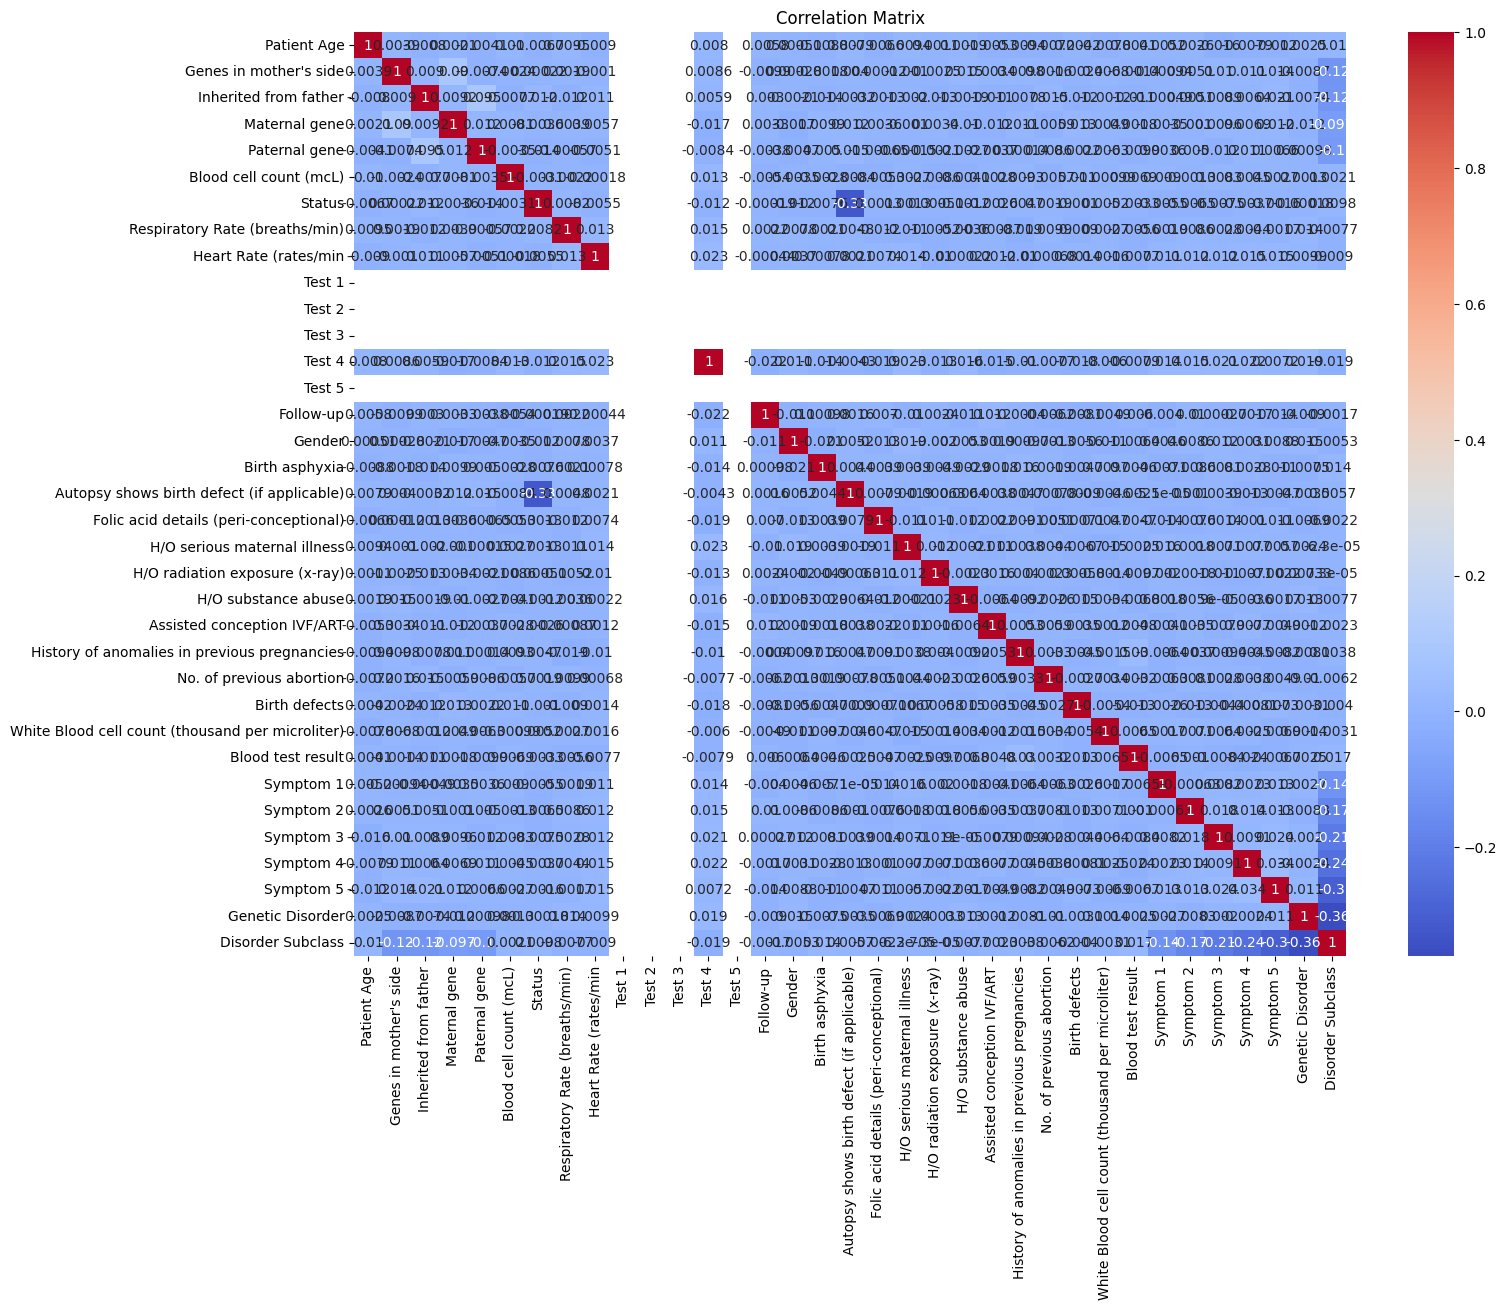

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the attributes to include in the correlation matrix
attributes = ['Patient Id', 'Patient Age', "Genes in mother's side",
              'Inherited from father', 'Maternal gene', 'Paternal gene',
              'Blood cell count (mcL)', 'Patient First Name', "Father's name",
              "Mother's age", "Father's age", 'Status',
              'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
              'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
              'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
              'Autopsy shows birth defect (if applicable)',
              'Folic acid details (peri-conceptional)',
              'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
              'H/O substance abuse', 'Assisted conception IVF/ART',
              'History of anomalies in previous pregnancies',
              'No. of previous abortion', 'Birth defects',
              'White Blood cell count (thousand per microliter)',
              'Blood test result', 'Symptom 1', 'Symptom 2', 'Symptom 3',
              'Symptom 4', 'Symptom 5', 'Genetic Disorder', 'Disorder Subclass']

# Create a new DataFrame containing only the selected attributes
data_selected = df[attributes]

# Compute the correlation matrix
#correlation_matrix = data_selected.corr()
cor_mat=data.corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 [Text(-0.5, 0, '−0.5'),
  Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5')])

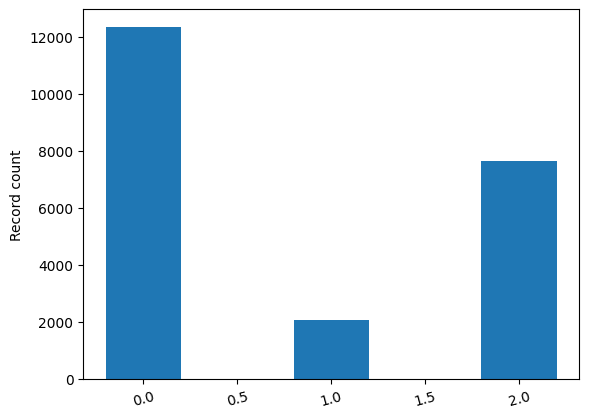

In [ ]:
import matplotlib.pyplot as plt
plt.bar(x=df['Genetic Disorder'].value_counts().index,height = df['Genetic Disorder'].value_counts(), width = 0.4)
plt.ylabel("Record count")
plt.xticks(rotation = 15)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10')])

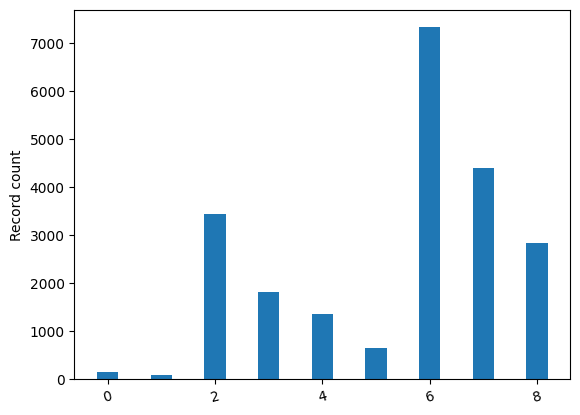

In [ ]:
import matplotlib.pyplot as plt
plt.bar(x=df['Disorder Subclass'].value_counts().index,height = df['Disorder Subclass'].value_counts(), width = 0.4)
plt.ylabel("Record count")
plt.xticks(rotation = 15)

ACCURACIES

1.RANDOM FOREST


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset


# Preprocess dataset
# Remove any irrelevant features
# Encode categorical variables using one-hot encoding or label encoding
# Normalize numerical features using StandardScaler

# Split dataset into training and testing sets
X = data.drop(['Genetic Disorder', 'Disorder Subclass'], axis=1)
y_genetic = data['Genetic Disorder']
y_subclass = data['Disorder Subclass']
X_train, X_test, y_genetic_train, y_genetic_test, y_subclass_train, y_subclass_test = train_test_split(X, y_genetic, y_subclass, test_size=0.2, random_state=42)

# Train machine learning model
model_genetic = RandomForestClassifier(n_estimators=100, random_state=42)
model_subclass = RandomForestClassifier(n_estimators=100, random_state=42)
model_genetic.fit(X_train, y_genetic_train)
model_subclass.fit(X_train, y_subclass_train)

# Make predictions on testing set
y_genetic_pred = model_genetic.predict(X_test)
y_subclass_pred = model_subclass.predict(X_test)

# Evaluate performance using accuracy score
genetic_accuracy = accuracy_score(y_genetic_test, y_genetic_pred)
subclass_accuracy = accuracy_score(y_subclass_test, y_subclass_pred)

 #Make predictions on testing set
y_genetic_pred = model_genetic.predict(X_test)
y_subclass_pred = model_subclass.predict(X_test)

# Output predictions
predictions_df = pd.DataFrame({'Actual Disorder Subclass': y_subclass_test, 'Predicted Disorder Subclass': y_subclass_pred})
print(predictions_df.head())
# Print accuracy scores
print("Accuracy for Genetic Disorder Prediction:", genetic_accuracy)
print("Accuracy for Disorder Subclass Prediction:", subclass_accuracy)

       Actual Disorder Subclass  Predicted Disorder Subclass
16316                         7                            7
7744                          6                            6
221                           2                            6
7858                          4                            4
13925                         6                            7
Accuracy for Genetic Disorder Prediction: 0.5838804618519357
Accuracy for Disorder Subclass Prediction: 0.37378311070862574


2.GRADIENT BOOSTER


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Normalize numerical features using StandardScaler

# Split dataset into training and testing sets
#X = data.drop(['Genetic Disorder', 'Disorder Subclass'], axis=1)
# y_genetic = data['Genetic Disorder']
# y_subclass = data['Disorder Subclass']
X_train, X_test, y_genetic_train, y_genetic_test, y_subclass_train, y_subclass_test = train_test_split(X, y_genetic, y_subclass, test_size=0.2, random_state=42)

# Train machine learning model
model_genetic = GradientBoostingClassifier(random_state=42)
model_subclass = GradientBoostingClassifier(random_state=42)
model_genetic.fit(X_train, y_genetic_train)
model_subclass.fit(X_train, y_subclass_train)

# Make predictions on testing set
y_genetic_pred = model_genetic.predict(X_test)
y_subclass_pred = model_subclass.predict(X_test)

# Evaluate performance using accuracy score
genetic_accuracy = accuracy_score(y_genetic_test, y_genetic_pred)
subclass_accuracy = accuracy_score(y_subclass_test, y_subclass_pred)

# Print accuracy scores
print("Accuracy for Genetic Disorder Prediction:", genetic_accuracy)
print("Accuracy for Disorder Subclass Prediction:", subclass_accuracy)


Accuracy for Genetic Disorder Prediction: 0.5870500339597011
Accuracy for Disorder Subclass Prediction: 0.40027167760923704


3.SVM

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Genetic Disorder', axis=1), data['Genetic Disorder'], test_size=0.2)

# Create SVM model
model = SVC(kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.74


In [ ]:
# pip install gradio
len(X.columns)

33

In [ ]:
new_cols = ['patientAge', 'genesInMothersSide', 'inheritedFromFather', 'maternalGene', 'paternalGene', 'bloodCellCount', 'status', 'respiratoryRate', 'heartRate', 'test1', 'test2', 'test3', 'test4', 'test5', 'followUp', 'gender', 'birthAsphyxia', 'autopsyShowsBirthDefect', 'folicAcidDetails', 'historyOfSeriousMaternalIllness', 'historyOfRadiationExposure', 'historyOfSubstanceAbuse', 'assistedConceptionIVFART', 'historyOfAnomaliesInPreviousPregnancies', 'numberOfPreviousAbortion', 'birthDefects', 'whiteBloodCellCount', 'bloodTestResult', 'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'geneticDisorder', 'disorderSubclass']

In [ ]:
len(new_cols)

35

In [ ]:
tst = [11,0,0,1,0,5,0,1,1,0,0,0,1,0,1,2,3,2,1,1,1,1,0,1,0,0,7,3,1,1,1,0,1,0,6]

In [ ]:
len(tst)

35

In [ ]:
len(new_cols)

35

In [ ]:
len(data.columns)

35

In [ ]:
data['Disorder Subclass'].unique()

array([5, 2, 3, 6, 1, 8, 4, 7, 0])

OUTPUT:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC

def svm_genetic_disorder_prediction(patient_info):
  
    X = data.drop(['Genetic Disorder', 'Disorder Subclass'], axis=1)
    y_genetic = data['Genetic Disorder']
    y_subclass = data['Disorder Subclass']
  


    model_genetic = SVC(kernel='linear')
    model_subclass = SVC(kernel ='linear')
    X_train, X_test, y_genetic_train, y_genetic_test, y_subclass_train, y_subclass_test = train_test_split(X, y_genetic, y_subclass, test_size=0.2, random_state=42)

    
    model_genetic.fit(X_train, y_genetic_train)
    model_subclass.fit(X_train, y_subclass_train)
    

    y_genetic_pred = model_genetic.predict(patient_info)
    y_subclass_pred = model_subclass.predict(patient_info)

    # arr = y_subclass_pred
    a = y_genetic_pred
    b = y_subclass_pred
    return Genetic_Disorder_map[a[0]],Disorder_Subclass_map[b[0]]
    


In [ ]:
dt ={
    'Patient Age': 30,
    'Genes in mother\'s side': 1,
    'Inherited from father': 1,
    'Maternal gene': 1,
    'Paternal gene': 1,
    'Blood cell count (mcL)': 4,
    'Status': 0,
    'Respiratory Rate (breaths/min)': 1,
    'Heart Rate (rates/min': 1,
    'Test 1': 1,
    'Test 2': 1,
    'Test 3': 1,
    'Test 4': 1,
    'Test 5': 1,
    'Follow-up': 0,
    'Gender': 1,
    'Birth asphyxia': 0,
    'Autopsy shows birth defect (if applicable)': 0,
    'Folic acid details (peri-conceptional)': 1,
    'H/O serious maternal illness': 0,
    'H/O radiation exposure (x-ray)': 0,
    'H/O substance abuse': 0,
    'Assisted conception IVF/ART': 0,
    'History of anomalies in previous pregnancies': 0,
    'No. of previous abortion': 0,
    'Birth defects': 0,
    'White Blood cell count (thousand per microliter)': 7,
    'Blood test result': 1,
    'Symptom 1': 1,
    'Symptom 2': 0,
    'Symptom 3': 0,
    'Symptom 4': 0,
    'Symptom 5': 0    

}
patient_info = pd.DataFrame([dt])

#len(patient_info)
#feature_list = ['patientAge', 'genesInMothersSide', 'inheritedFromFather',       'maternalGene', 'paternalGene', 'bloodCellCount', 'status',       'respiratoryRate', 'heartRate', 'test1', 'test2', 'test3', 'test4',       'test5', 'followUp', 'gender', 'birthAsphyxia',       'autopsyShowsBirthDefect', 'folicAcidDetails',       'historyOfSeriousMaternalIllness', 'historyOfRadiationExposure',       'historyOfSubstanceAbuse', 'assistedConceptionIVFART',       'historyOfAnomaliesInPreviousPregnancies', 'numberOfPreviousAbortion',       'birthDefects', 'whiteBloodCellCount', 'bloodTestResult', 'symptom1',       'symptom2', 'symptom3', 'symptom4', 'symptom5', 'geneticDisorder',       'disorderSubclass']


In [ ]:
svm_genetic_disorder_prediction(patient_info)
#svm_genetic_disorder_prediction(patient_info)

('Mitochondrial genetic inheritance disorders', 'Leigh syndrome')

GRADIO

In [ ]:
def predict(patientAge, genesInMothersSide, inheritedFromFather,
           maternalGene, paternalGene, bloodCellCount, status,
           respiratoryRate, heartRate, test1, test2, test3, test4,
           test5, followUp, gender, birthAsphyxia,
           autopsyShowsBirthDefect, folicAcidDetails,
           historyOfSeriousMaternalIllness, historyOfRadiationExposure,
           historyOfSubstanceAbuse, assistedConceptionIVFART,
           historyOfAnomaliesInPreviousPregnancies, numberOfPreviousAbortion,
           birthDefects, whiteBloodCellCount, bloodTestResult, symptom1,
           symptom2, symptom3, symptom4, symptom5):
    dt ={
    'Patient Age': patientAge,
    'Genes in mother\'s side': genesInMothersSide,
    'Inherited from father': inheritedFromFather,
    'Maternal gene': maternalGene,
    'Paternal gene': paternalGene,
    'Blood cell count (mcL)':bloodCellCount ,
    'Status':status ,
    'Respiratory Rate (breaths/min)': respiratoryRate,
    'Heart Rate (rates/min': heartRate,
    'Test 1': test1,
    'Test 2': test2,
    'Test 3': test3,
    'Test 4': test4,
    'Test 5': test5,
    'Follow-up': followUp,
    'Gender': gender,
    'Birth asphyxia': birthAsphyxia,
    'Autopsy shows birth defect (if applicable)': autopsyShowsBirthDefect,
    'Folic acid details (peri-conceptional)': folicAcidDetails,
    'H/O serious maternal illness': historyOfSeriousMaternalIllness,
    'H/O radiation exposure (x-ray)': historyOfRadiationExposure,
    'H/O substance abuse': historyOfSubstanceAbuse,
    'Assisted conception IVF/ART': assistedConceptionIVFART ,
    'History of anomalies in previous pregnancies': historyOfAnomaliesInPreviousPregnancies,
    'No. of previous abortion':numberOfPreviousAbortion ,
    'Birth defects': birthDefects,
    'White Blood cell count (thousand per microliter)': whiteBloodCellCount,
    'Blood test result': bloodTestResult,
    'Symptom 1': symptom1,
    'Symptom 2': symptom2,
    'Symptom 3': symptom3,
    'Symptom 4': symptom4,
    'Symptom 5': symptom5    

    }
    patient_info = pd.DataFrame([dt])
    return svm_genetic_disorder_prediction(patient_info)
   
    
    
print(predict(30,1,1,1,1,4,0,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,7,1,1,0,0,0,0,0,0))
   
  

In [ ]:
!pip install gradio
import gradio as gr
#title = input("Enter title: ")
#description = input("Enter description: ")
#input_text = gr.inputs.Textbox(label='Input Title')
input_text = [gr.inputs.Textbox(label='Patient Age'),
gr.inputs.Textbox(label='Genes Inherited from Mother'),
gr.inputs.Textbox(label='Inherited from Father'),
gr.inputs.Textbox(label='Maternal Gene'),
gr.inputs.Textbox(label='Paternal Gene'),
gr.inputs.Textbox(label='Blood Cell Count'),
gr.inputs.Textbox(label='Status'),
gr.inputs.Textbox(label='Respiratory Rate'),
gr.inputs.Textbox(label='Heart Rate'),
gr.inputs.Textbox(label='Test 1'),
gr.inputs.Textbox(label='Test 2'),
gr.inputs.Textbox(label='Test 3'),
gr.inputs.Textbox(label='Test 4'),
gr.inputs.Textbox(label='Test 5'),
gr.inputs.Textbox(label='Follow-up'),
gr.inputs.Textbox(label='Gender'),
gr.inputs.Textbox(label='Birth Asphyxia'),
gr.inputs.Textbox(label='Autopsy Shows Birth Defect'),
gr.inputs.Textbox(label='Folic Acid Details'),
gr.inputs.Textbox(label='History of Serious Maternal Illness'),
gr.inputs.Textbox(label='History of Radiation Exposure'),
gr.inputs.Textbox(label='History of Substance Abuse'),
gr.inputs.Textbox(label='Assisted Conception (IVF/ART)'),
gr.inputs.Textbox(label='History of Anomalies in Previous Pregnancies'),
gr.inputs.Textbox(label='Number of Previous Abortion'),
gr.inputs.Textbox(label='Birth Defects'),
gr.inputs.Textbox(label='White Blood Cell Count'),
gr.inputs.Textbox(label='Blood Test Result'),
gr.inputs.Textbox(label='Symptom 1'),
gr.inputs.Textbox(label='Symptom 2'),
gr.inputs.Textbox(label='Symptom 3'),
gr.inputs.Textbox(label='Symptom 4'),
gr.inputs.Textbox(label='Symptom 5')
]
output_text = gr.outputs.Textbox(label='Predicted Category')
interface = gr.Interface(fn=predict, inputs=input_text, outputs=output_text)

# Launch the interface
interface.launch(share=True,debug=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 K

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://e0cf63eb39619be34a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
